In [121]:
# metrics_dir = "lls_logs/cola_1_losslandscape.csv"
# metrics_dir = "lls_logs/rte_0.1_losslandscape.csv"
# metrics_dir = "lls_logs/cola_long_losslandscape.csv"
# metrics_dir = "lls_logs/cola_1SB_lls.csv"
# metrics_dir = "lls_logs/rte_1SB_GT_100_lls.csv"
# metrics_dir = "lls_logs/rte_1SB_lls.csv"
metrics_dir = "lls_logs/cola_1SB_lls.csv"

In [122]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


# load losslandscape raw data of ResNet-50 or ViT-Ti
# names = ["x", "y", "l1", "l2", "NLL", "Cutoff1", "Cutoff2", "Acc", "Acc-90", "Unc", "Unc-90", "IoU", "IoU-90", "Freq", "Freq-90", "Top-5", "Brier", "ECE", "ECSE"]
# path = "%s/resources/results/cifar100_vit_ti_losslandscape.csv" % root  # for ViT-Ti

names = ["x", "y", "NLL"]
data = pd.read_csv(metrics_dir, names=names)
data["loss"] = data["NLL"] # + optim_args["weight_decay"] * data["l2"]  # NLL + l2

# prepare data
p = int(math.sqrt(len(data)))
shape = [p, p]
xs = data["x"].to_numpy().reshape(shape) 
ys = data["y"].to_numpy().reshape(shape)
zs = data["loss"].to_numpy().reshape(shape)

# zs = zs - zs[np.isfinite(zs)].min()
# zs[zs > 42] = np.nan

norm = plt.Normalize(zs[np.isfinite(zs)].min(), zs[np.isfinite(zs)].max())  # normalize to [0,1]
colors = cm.Blues_r(norm(zs))
rcount, ccount, _ = colors.shape



In [94]:
zs.min()

2.33073408231442

/tmp/ipykernel_1356317/4146539676.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


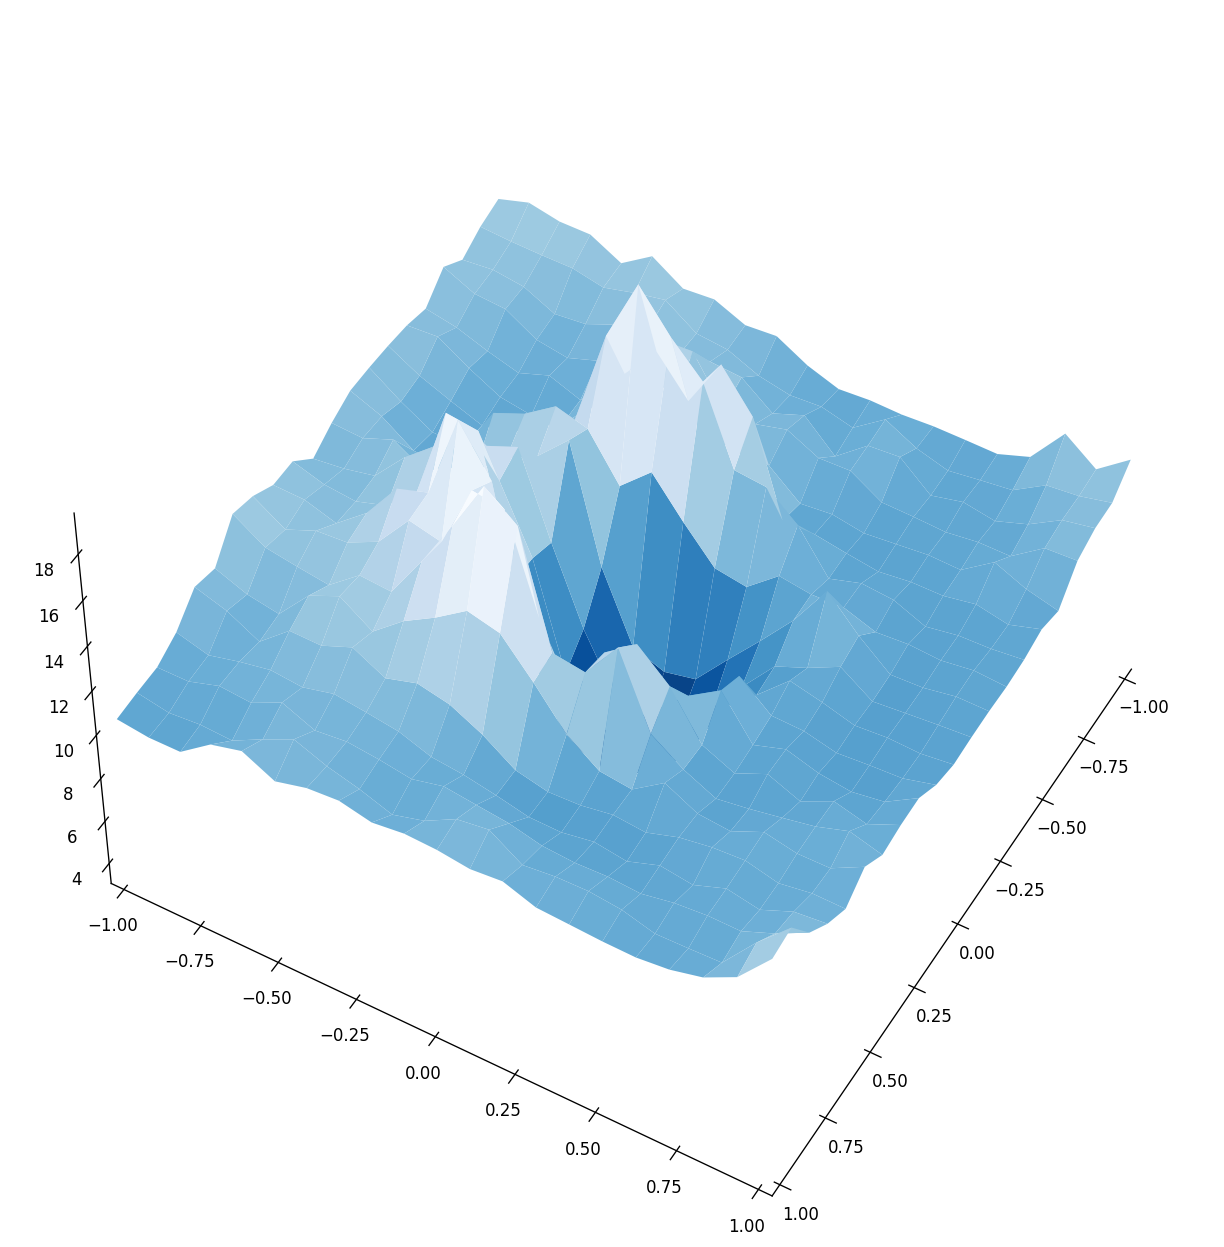

In [124]:
fig = plt.figure(figsize=(10, 10), dpi=120)
ax = fig.gca(projection="3d")
ax.view_init(elev=50, azim=30)  # angle

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

surf = ax.plot_surface(
    xs, ys, zs, 
    rcount=rcount, ccount=ccount,
    cmap="Blues_r", shade=False
)

# surf = ax.plot_surface(
#     xs, ys, zs, 
#     rcount=rcount, ccount=ccount,
#     facecolors=colors, shade=False,
# )
# surf.set_facecolor((0,0,0,0))

# remove white spaces
adjust_lim = 1
ax.set_xlim(-1 * adjust_lim, 1 * adjust_lim)
ax.set_ylim(-1 * adjust_lim, 1 * adjust_lim)
# ax.set_zlim(0, 50)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
#ax.axis('off')

ls = 10
ax.tick_params(axis="x", labelsize=ls)
ax.tick_params(axis="y", labelsize=ls)
ax.tick_params(axis="z", labelsize=ls)

plt.show()